
```
Name : Zullinira Dwi Utami
Email : zullinira23@gmail.com
```



## **Data Preparation**

Import library and dataset

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [120]:
# mounted google drive
import google.colab as gc
gc.drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [121]:
!pwd

/content/drive/My Drive/Study Case/Customer Churn


In [122]:
# change folder
%cd '/content/drive/MyDrive/Study Case/Customer Churn'

/content/drive/MyDrive/Study Case/Customer Churn


In [123]:
# check file in folder
!ls

'Customer Churn Analysis.ipynb'         WA_Fn-UseC_-Telco-Customer-Churn.gsheet
 WA_Fn-UseC_-Telco-Customer-Churn.csv


In [124]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [125]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## **Exploratory Data Analysis (EDA)**

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [127]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Cleaning data


In [128]:
def summarize_dataset(df):
    summary = pd.DataFrame(df.dtypes, columns=['Data Types'])
    summary = summary.reset_index()
    summary['Missing Values'] = df.isnull().sum().values
    summary['Unique Values'] = df.nunique().values
    
    return summary

In [129]:
display(summarize_dataset(df))

,index,Data Types,Missing Values,Unique Values
0,customerID,object,0,7043
1,gender,object,0,2
2,SeniorCitizen,int64,0,2
3,Partner,object,0,2
4,Dependents,object,0,2
5,tenure,int64,0,73
6,PhoneService,object,0,2
7,MultipleLines,object,0,3
8,InternetService,object,0,3
9,OnlineSecurity,object,0,3


Filter CustomerID

In [130]:
df['customerID'].duplicated().any()

False

In [131]:
df[df.duplicated(keep=False)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


No customer ID duplicated

ubah type data

In [132]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [133]:
display(summarize_dataset(df))

,index,Data Types,Missing Values,Unique Values
0,customerID,object,0,7043
1,gender,object,0,2
2,SeniorCitizen,int64,0,2
3,Partner,object,0,2
4,Dependents,object,0,2
5,tenure,int64,0,73
6,PhoneService,object,0,2
7,MultipleLines,object,0,3
8,InternetService,object,0,3
9,OnlineSecurity,object,0,3


In [134]:
df[df.isnull().any(axis=1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [135]:
#drop missing value
df.drop(df[df['TotalCharges'].isnull()].index,inplace=True)
df.reset_index(drop=True, inplace=True)

In [136]:
#recheck missing value
display(summarize_dataset(df))

,index,Data Types,Missing Values,Unique Values
0,customerID,object,0,7032
1,gender,object,0,2
2,SeniorCitizen,int64,0,2
3,Partner,object,0,2
4,Dependents,object,0,2
5,tenure,int64,0,72
6,PhoneService,object,0,2
7,MultipleLines,object,0,3
8,InternetService,object,0,3
9,OnlineSecurity,object,0,3


In [137]:
df.shape

(7032, 21)

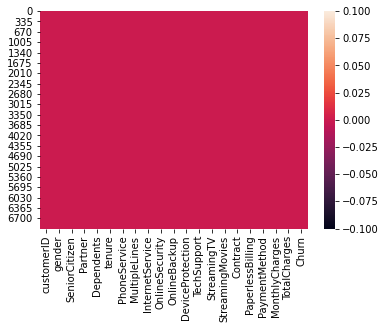

In [138]:
#visualization missing values
sns.heatmap(df.isnull())

In [139]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [140]:
numeric_columns =['tenure', 'MonthlyCharges', 'TotalCharges']

Cek Outlier

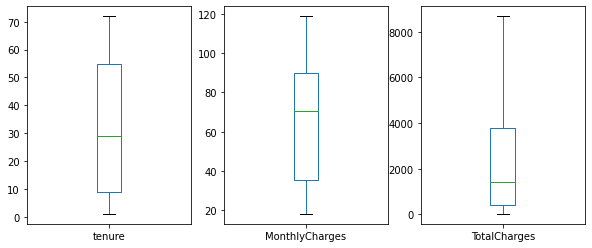

In [141]:
#cek outlier
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(10,4))

for i,el in enumerate(numeric_columns):
    a = df.boxplot(el, ax=axes.flatten()[i],grid=False)

plt.show()

No outlier in dataset

Change categorical data to numeric data

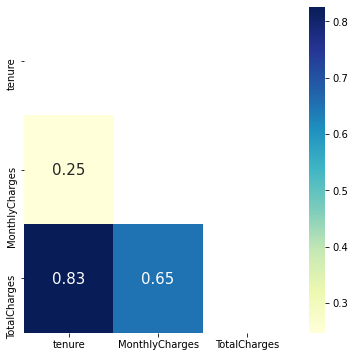

In [142]:
# check correlation between column
df_corr = df[numeric_columns]

correlation = df_corr.corr()
upper_triangle_corr = np.triu(correlation)

fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(correlation, annot = True, cmap="YlGnBu",ax=ax,annot_kws={"size":15},mask=upper_triangle_corr)

Visualization

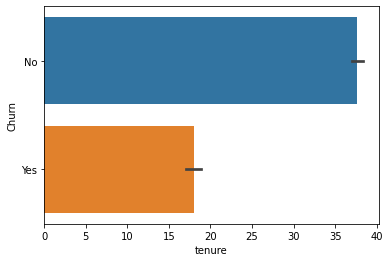

In [143]:
sns.barplot(data = df, x="tenure", y ="Churn")

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


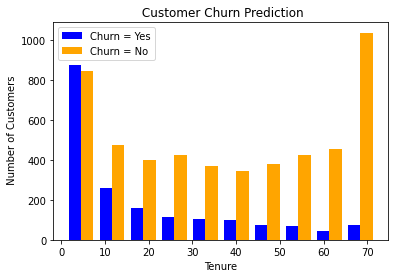

In [144]:
tenure_churn_no = df[df.Churn == "No"].tenure
tenure_churn_yes = df[df.Churn == "Yes"].tenure

plt.hist([tenure_churn_yes, tenure_churn_no],
         color = ["blue","orange"],
         label = ["Churn = Yes","Churn = No"])
plt.xlabel ("Tenure")
plt.ylabel (" Number of Customers")
plt.title (" Customer Churn Prediction")
plt.legend()
plt.show()

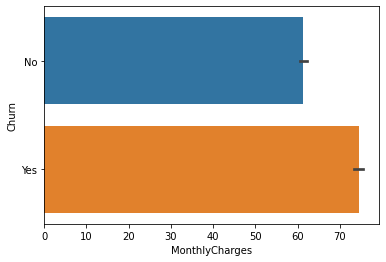

In [145]:
sns.barplot(data = df, x="MonthlyCharges", y ="Churn")

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


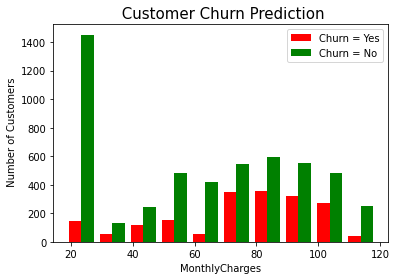

In [146]:
MonthlyCharges_churn_no = df[df.Churn == "No"].MonthlyCharges
MonthlyCharges_churn_yes = df[df.Churn == "Yes"].MonthlyCharges

plt.hist([MonthlyCharges_churn_yes, MonthlyCharges_churn_no],
         color = ["red","green"],
         label = ["Churn = Yes","Churn = No"])
plt.xlabel ("MonthlyCharges")
plt.ylabel (" Number of Customers")
plt.title (" Customer Churn Prediction",fontdict={'fontsize': 15})
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


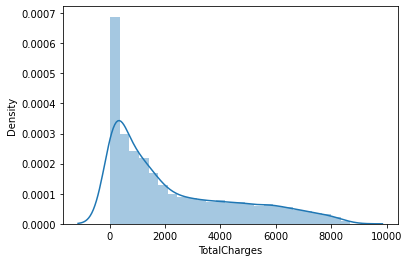

In [147]:
sns.distplot(df['TotalCharges'])

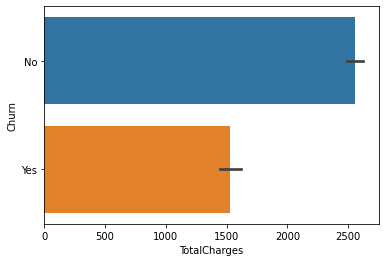

In [148]:
sns.barplot(data = df, x="TotalCharges", y ="Churn")

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


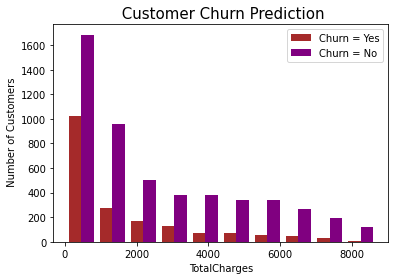

In [149]:
TotalCharges_churn_no = df[df.Churn == "No"].TotalCharges
TotalCharges_churn_yes = df[df.Churn == "Yes"].TotalCharges

plt.hist([TotalCharges_churn_yes, TotalCharges_churn_no],
         color = ["brown","purple"],
         label = ["Churn = Yes","Churn = No"])
plt.xlabel ("TotalCharges")
plt.ylabel (" Number of Customers")
plt.title (" Customer Churn Prediction", fontdict={'fontsize': 15})
plt.legend()
plt.show()


In [150]:
#show the unique values

for i in df.columns:
  if df[i].dtypes == "object":
    print(f'{i} : {df[i].unique()}')
    print("--------------------------------------------------------")

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
--------------------------------------------------------
gender : ['Female' 'Male']
--------------------------------------------------------
Partner : ['Yes' 'No']
--------------------------------------------------------
Dependents : ['No' 'Yes']
--------------------------------------------------------
PhoneService : ['No' 'Yes']
--------------------------------------------------------
MultipleLines : ['No phone service' 'No' 'Yes']
--------------------------------------------------------
InternetService : ['DSL' 'Fiber optic' 'No']
--------------------------------------------------------
OnlineSecurity : ['No' 'Yes' 'No internet service']
--------------------------------------------------------
OnlineBackup : ['Yes' 'No' 'No internet service']
--------------------------------------------------------
DeviceProtection : ['No' 'Yes' 'No internet service']
------------------------------------

change categorical columns

In [151]:
#no internet service or no phone service, that can be replaced with a simple No
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [152]:
# replacing Female = 0 and Male =1
df['gender'].replace({'Female':0,'Male':1},inplace=True)

In [153]:
# Replace Value Yes = 1 and No = 0

yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines',
                   'OnlineSecurity','OnlineBackup','DeviceProtection',
                   'TechSupport','StreamingTV','StreamingMovies',
                   'PaperlessBilling','Churn']

for i in yes_no_columns:
  df[i].replace({"Yes":1, "No" : 0}, inplace = True)

In [154]:
#One hot encoding for categorical columns /  more than 2 categories
df2 = pd.get_dummies(data =df , columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [155]:
 df2.drop(columns='customerID',inplace =True)

In [156]:
for i in df2.columns:
    print(df2[i].unique())

[0 1]
[0 1]
[1 0]
[0 1]
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
[0 1]
[1 0]
[0 1]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]


In [157]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [158]:
display(summarize_dataset(df2))

,index,Data Types,Missing Values,Unique Values
0,gender,int64,0,2
1,SeniorCitizen,int64,0,2
2,Partner,int64,0,2
3,Dependents,int64,0,2
4,tenure,int64,0,72
5,PhoneService,int64,0,2
6,MultipleLines,int64,0,2
7,OnlineSecurity,int64,0,2
8,OnlineBackup,int64,0,2
9,DeviceProtection,int64,0,2


Standard Scaling

In [159]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [160]:
columns_scale =['tenure','MonthlyCharges','TotalCharges']
df2[columns_scale]= scaler.fit_transform(df2[columns_scale])

In [161]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,0,0,0,1,0.115423,0.001275,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,0,0,0,0,0.385075,0.215867,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,0,0,0,1,0.354229,0.010310,1,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,1,0,1,1,0,0,0,0.239303,0.210241,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,0,0,0,1,0.521891,0.015330,1,0,1,0,1,0,0,0,0,1,0


## **Modelling**

Train Test Split

In [207]:
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

In [208]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 41)

In [209]:
# check the shape data
print('Shape Data X Train:')
print(X_train.shape)
print('\nShape Data X Test:')
print(X_test.shape)
print('\nShape Data y Train:')
print(y_train.shape)
print('\nShape Data y Test:')
print(y_test.shape)

Shape Data X Train:
(5274, 26)

Shape Data X Test:
(1758, 26)

Shape Data y Train:
(5274,)

Shape Data y Test:
(1758,)


## **Logistic Regression**

In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [166]:
# load the algorithm
#model_LR = LogisticRegression(max_iter=120,random_state= 41, class_weight='balanced')
model_LR = LogisticRegression(max_iter=120,random_state= 41)

In [167]:
# Model Training
model_LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=120,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=41, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [168]:
y_train_pred_LR = model_LR.predict(X_train)
y_test_pred_LR = model_LR.predict(X_test) 

In [169]:
# evaluate classification model - accuracy
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix

accuracy_training_LR = metrics.accuracy_score(y_train,y_train_pred_LR)
accuracy_test_LR = metrics.accuracy_score(y_test, y_test_pred_LR)

print('Accuracy Training :', accuracy_training_LR)
print('Accuracy Tes : ', accuracy_test_LR)

Accuracy Training : 0.8058399696624953
Accuracy Tes :  0.8071672354948806


In [170]:
#confusion_matrix

print(confusion_matrix(y_train,y_train_pred_LR))
print(confusion_matrix(y_test,y_test_pred_LR))

[[3492  396]
 [ 628  758]]
[[1149  126]
 [ 213  270]]


F1_Score

In [171]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [172]:
F1score_train_LR = f1_score(y_train,y_train_pred_LR)
F1score_test_LR = f1_score(y_test, y_test_pred_LR)

print('F1score_train_LR :', F1score_train_LR)
print('F1score_test_LR : ', F1score_test_LR)

F1score_train_LR : 0.5968503937007873
F1score_test_LR :  0.614334470989761


In [173]:
y_train.value_counts()

0    3888
1    1386
Name: Churn, dtype: int64

Applying SMOTE

In [174]:
pip install imblearn

In [175]:
from imblearn.over_sampling import SMOTE

In [176]:
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [177]:
np.bincount(y_train)

array([3888, 3888])

In [178]:
model_LR = LogisticRegression(max_iter=120,random_state= 41)

In [179]:
model_LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=120,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=41, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [180]:
y_train_pred_LR = model_LR.predict(X_train)
y_test_pred_LR = model_LR.predict(X_test) 

In [181]:
# evaluate classification model - accuracy
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix

accuracy_training_LR = metrics.accuracy_score(y_train,y_train_pred_LR)
accuracy_test_LR = metrics.accuracy_score(y_test, y_test_pred_LR)

print('Accuracy Training :', accuracy_training_LR)
print('Accuracy Tes : ', accuracy_test_LR)

Accuracy Training : 0.7777777777777778
Accuracy Tes :  0.7377701934015927


In [182]:
#confusion_matrix

print(confusion_matrix(y_train,y_train_pred_LR))
print(confusion_matrix(y_test,y_test_pred_LR))

[[2881 1007]
 [ 721 3167]]
[[916 359]
 [102 381]]


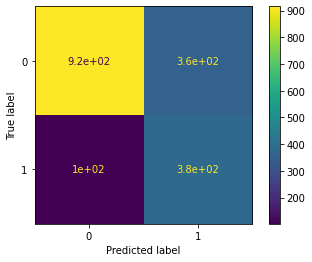

In [183]:
#membuat confusion matrix yang lebih bagus

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_LR, X_test,y_test)

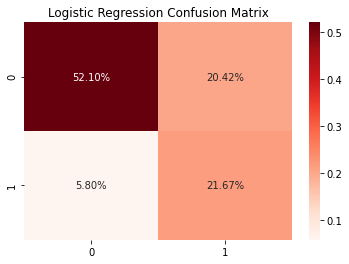

In [184]:
# confusion Matrix

cm1 = confusion_matrix(y_test, y_test_pred_LR )
sns.heatmap(cm1/np.sum(cm1), annot=True, fmt='0.2%', cmap="Reds")
plt.title("Logistic Regression Confusion Matrix",fontsize=12)
plt.show()

## **Random Forest**

In [185]:
from sklearn.ensemble import RandomForestClassifier

In [186]:
#model_RF= RandomForestClassifier(n_estimators=300,min_samples_leaf=0.16, random_state=42, class_weight='balanced')
model_RF= RandomForestClassifier(n_estimators=300,min_samples_leaf=0.16, random_state=42)

In [187]:
# Training Model
model_RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.16, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [188]:
np.bincount(y_train)

array([3888, 3888])

In [189]:
y_train_pred_RF = model_RF.predict(X_train)
y_test_pred_RF = model_RF.predict(X_test) 

In [190]:
# evaluate classification model - accuracy
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix

accuracy_training_RF = metrics.accuracy_score(y_train,y_train_pred_RF)
accuracy_test_RF = metrics.accuracy_score(y_test, y_test_pred_RF)

print('Accuracy Training :', accuracy_training_RF)
print('Accuracy Tes : ', accuracy_test_RF)

Accuracy Training : 0.7682613168724279
Accuracy Tes :  0.7542662116040956


In [191]:
#confusion_matrix

print(confusion_matrix(y_train,y_train_pred_RF))
print(confusion_matrix(y_test,y_test_pred_RF))

[[2927  961]
 [ 841 3047]]
[[965 310]
 [122 361]]


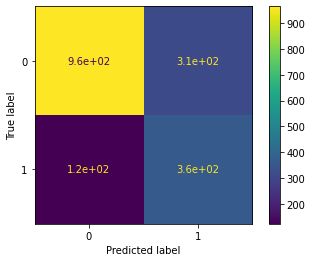

In [192]:
#membuat confusion matrix yang lebih bagus

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_RF, X_test,y_test)

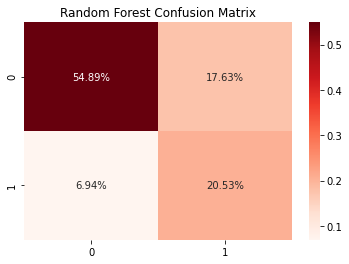

In [193]:
# confusion Matrix

cm1 = confusion_matrix(y_test, y_test_pred_RF )
sns.heatmap(cm1/np.sum(cm1), annot=True, fmt='0.2%', cmap="Reds")
plt.title("Random Forest Confusion Matrix",fontsize=12)
plt.show()

## **Decision Tree**

In [194]:
from sklearn.tree import DecisionTreeClassifier

In [195]:
#creat model
#model_DT = DecisionTreeClassifier(max_depth=4, random_state=42, class_weight='balanced')
model_DT = DecisionTreeClassifier(max_depth=4, random_state=42)

In [196]:
model_DT.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [197]:
y_train_pred_DT = model_DT.predict(X_train)
y_test_pred_DT = model_DT.predict(X_test) 

In [198]:
# evaluate classification model - accuracy
accuracy_training_DT = metrics.accuracy_score(y_train,y_train_pred_DT)
accuracy_test_DT = metrics.accuracy_score(y_test,y_test_pred_DT)

print('Accuracy Training Data: {}'.format(accuracy_training_DT))
print('Accuracy Test Data: {}'.format(accuracy_test_DT))

Accuracy Training Data: 0.7660751028806584
Accuracy Test Data: 0.732650739476678


In [199]:
#confusion_matrix

print(confusion_matrix(y_train,y_train_pred_DT))
print(confusion_matrix(y_test,y_test_pred_DT))

[[2712 1176]
 [ 643 3245]]
[[897 378]
 [ 92 391]]


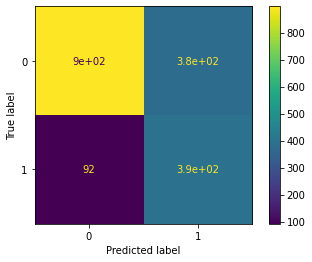

In [200]:
#membuat confusion matrix yang lebih bagus

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_DT, X_test,y_test)

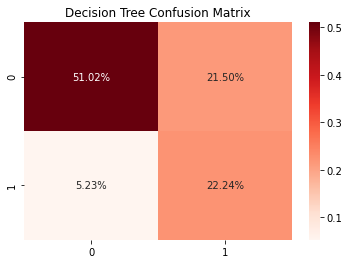

In [201]:
# confusion Matrix

cm1 = confusion_matrix(y_test, y_test_pred_DT )
sns.heatmap(cm1/np.sum(cm1), annot=True, fmt='0.2%', cmap="Reds")
plt.title("Decision Tree Confusion Matrix",fontsize=12)
plt.show()

,Model,Accuracy_score
0,Logistic Regression,0.737770
1,Random Forest,0.754266
2,Decision Tree,0.732651


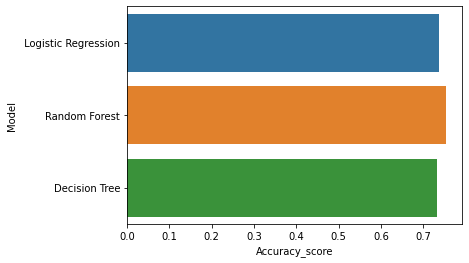

In [202]:
#summary
models = pd.DataFrame({
    'Model':[' Logistic Regression', 'Random Forest','Decision Tree'],
    'Accuracy_score' : [accuracy_test_LR,accuracy_test_RF,accuracy_test_DT]
})

display(models)
sns.barplot(x ='Accuracy_score', y='Model', data = models)
